# Car sales analysis

In [2]:
# importing necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# creating data frame
car_sales=pd.read_csv('Car_sales.csv')

In [4]:

car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
# required data cleaning

In [7]:
car_sales.duplicated().sum()

0

In [8]:
# no duplicates


In [9]:
car_sales.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [10]:
# many missing and Latest_Launch should be date time

In [11]:
car_sales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [12]:
# sales_in_thousands has great variation

# Data cleaning

In [13]:
#to see the rows with more than 1 null
car_null=car_sales[car_sales.isnull().sum(axis=1)>1]
car_null

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN
109,Oldsmobile,Intrigue,38.554,NaN,Passenger,24.15,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN,4/1/2011,86.272523


In [14]:
#dropping rows with more than 1 null value
car_sales.dropna(thresh=len(car_sales.columns)-1,inplace=True)


In [15]:
#filling missing values fith average and most common value
car_sales['Curb_weight'].fillna(car_sales['Curb_weight'].mean(),inplace=True)
car_sales['Fuel_efficiency'].fillna(car_sales['Curb_weight'].mode()[0],inplace=True)

In [16]:
# its unnecessary
car_sales.drop('Vehicle_type',axis=1,inplace=True)

In [17]:
# converting to date_time
car_sales['Latest_Launch'] = pd.to_datetime(car_sales['Latest_Launch'])

# Features

In [18]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639
5,Audi,A6,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105


In [19]:
# calculate the size of each car
size= car_sales['Width'] * car_sales['Length'] * car_sales['Wheelbase']

# create four equally-spaced size ranges and define category labels
car_category_labels = ['Small', 'Medium', 'Large', 'Extra Large']
car_sales['car_category'] = pd.cut(size, bins=4, labels=car_category_labels)

# print the value counts of the car categories
print(car_sales['car_category'].value_counts())



Medium         93
Small          38
Large          20
Extra Large     3
Name: car_category, dtype: int64


In [20]:
car_sales[car_sales['car_category']=='Extra Large']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,car_category
40,Dodge,Ram Pickup,227.061,15.060,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,2012-03-06,90.211700,Extra Large
42,Dodge,Ram Van,31.038,13.425,18.575,3.9,175.0,127.2,78.8,208.5,4.298,32.0,16.0,2012-07-26,70.078322,Extra Large
56,Ford,F-Series,540.561,15.075,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,2012-08-16,89.401935,Extra Large


In [21]:
# thats checks out right

In [22]:
# create four equally-spaced size ranges and define category labels
car_category_labels = ['Low_power','Medium_power','High_power','ultimate']
car_sales['Power'] = pd.cut(car_sales.Horsepower, bins=4, labels=car_category_labels)

# print the value counts of the car categories
print(car_sales['Power'].value_counts())



Medium_power    86
Low_power       49
High_power      18
ultimate         1
Name: Power, dtype: int64


In [23]:
car_sales[car_sales['Power']=='ultimate']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,car_category,Power
39,Dodge,Viper,0.916,58.47,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,2011-08-07,188.144323,Medium,ultimate


In [24]:
# Define the category boundaries
boundaries = [0,
              car_sales['Price_in_thousands'].quantile(0.30),
              car_sales['Price_in_thousands'].quantile(0.7),
              car_sales['Price_in_thousands'].quantile(0.8),
              car_sales['Price_in_thousands'].quantile(0.95),
              car_sales['Price_in_thousands'].max()]

# Define the category labels
labels = ['Budget', 'Medium', 'High', 'Elite', 'Legendary']
# Create the 'Price_Category' column using the pd.cut function
car_sales['Price_Category'] = pd.cut(car_sales['Price_in_thousands'], bins=boundaries, labels=labels, include_lowest=True)

# Display the first few rows of the DataFrame
car_sales['Price_Category'].value_counts()

Medium       62
Budget       46
Elite        23
High         15
Legendary     8
Name: Price_Category, dtype: int64

In [25]:
car_sales[car_sales['Price_Category']=='Legendary']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,car_category,Power,Price_Category
6,Audi,A8,1.380,39.000,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2012-02-27,134.656858,Medium,High_power,Legendary
39,Dodge,Viper,0.916,58.470,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,2011-08-07,188.144323,Medium,ultimate,Legendary
74,Lexus,LX470,9.126,NaN,60.105,4.7,230.0,112.2,76.4,192.5,5.401,25.4,15.0,2012-10-30,105.760458,Medium,Medium_power,Legendary
94,Mercedes-B,S-Class,16.774,50.375,69.700,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0,2011-06-13,125.273876,Large,High_power,Legendary
95,Mercedes-B,SL-Class,3.311,58.600,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,2011-03-17,139.982294,Small,High_power,Legendary
99,Mercedes-B,CL500,0.954,NaN,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,2011-04-11,141.100985,Medium,High_power,Legendary
125,Porsche,Carrera Coupe,1.280,60.625,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,2012-12-21,134.390975,Small,High_power,Legendary
126,Porsche,Carrera Cabrio,1.866,67.550,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,2011-07-11,135.914710,Small,High_power,Legendary


# Data visualizations

Text(0, 0.5, 'Frequency')

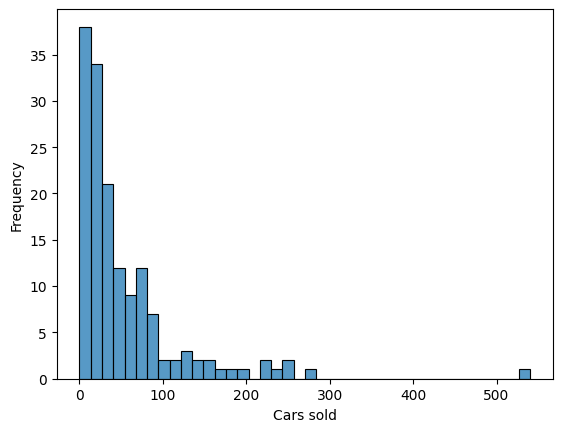

In [26]:

sns.histplot(car_sales.Sales_in_thousands,bins=40)
plt.xlabel('Cars sold')
plt.ylabel('Frequency')

In [27]:
# heavily right skewed

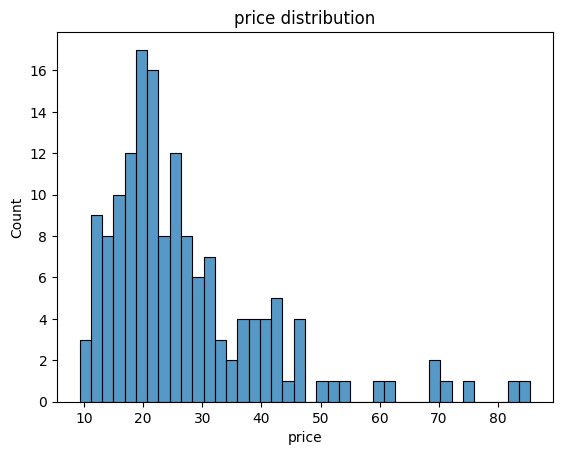

In [28]:
# price distribution
sns.histplot(car_sales.Price_in_thousands,bins=40)
plt.title('price distribution')
plt.xlabel('price')
plt.show()

In [29]:
# right skewed

In [30]:
# which is our top selling brand

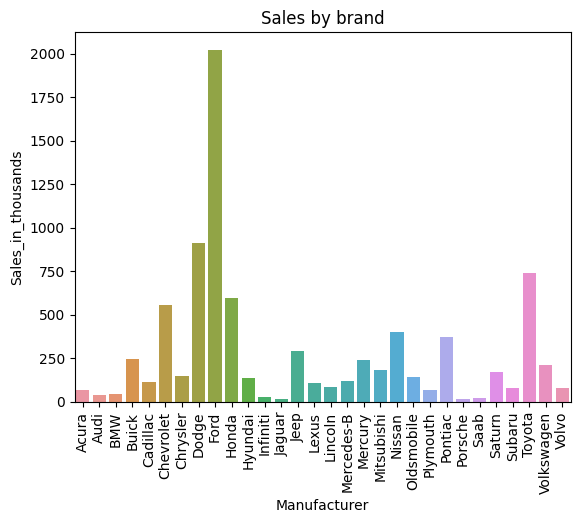

In [31]:
count_make=car_sales.groupby('Manufacturer')['Sales_in_thousands'].sum().reset_index()
sns.barplot(x='Manufacturer',y='Sales_in_thousands',data=count_make)
plt.xticks(rotation=90)
plt.title('Sales by brand')
plt.show()

In [32]:
#ford solds the most

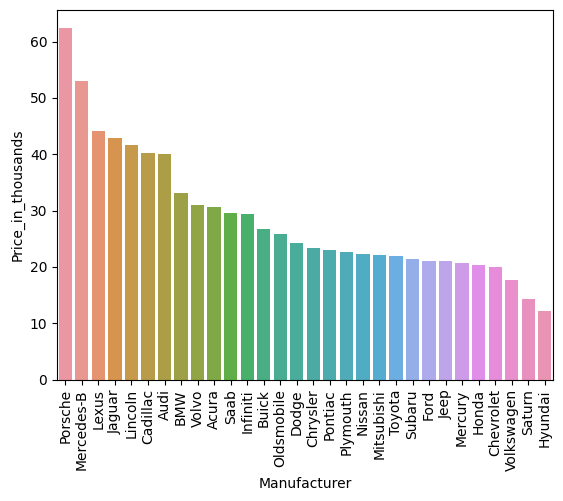

In [33]:
# average price of each brands
average_price_make=car_sales.groupby('Manufacturer')['Price_in_thousands'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Manufacturer',y='Price_in_thousands',data=average_price_make)
plt.xticks(rotation=90)
plt.show()

In [34]:
# porsche has highest average price and hyundai has least

In [35]:
car_sales.columns=car_sales.columns.str.replace('__','')

In [36]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'year_resale_value',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor', 'car_category', 'Power',
       'Price_Category'],
      dtype='object')

Text(0.5, 1.0, 'resale value and sales count')

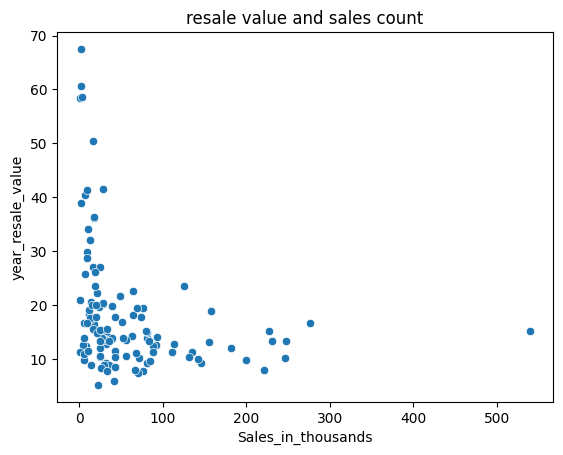

In [37]:
#checking if sales icreases if resale vale increases
sns.scatterplot(x='Sales_in_thousands',y='year_resale_value',data=car_sales)
plt.title('resale value and sales count')

In [38]:
# doesnt affect much

Text(0.5, 1.0, 'resale value and price')

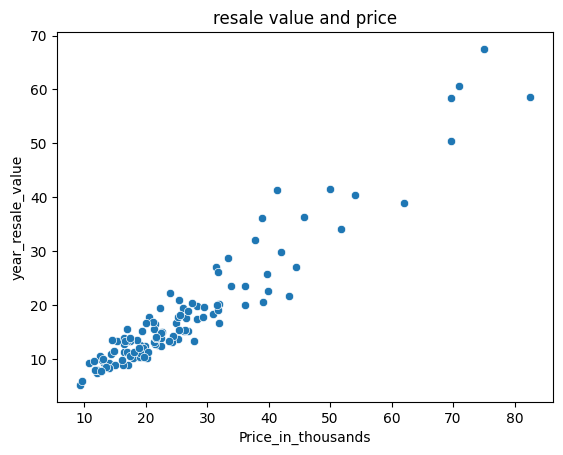

In [39]:
#checking if price increases if resale vale increases
sns.scatterplot(x='Price_in_thousands',y='year_resale_value',data=car_sales)
plt.title('resale value and price')

In [40]:
# obviously it also increases

Text(0.5, 1.0, 'resale value and power performance factor')

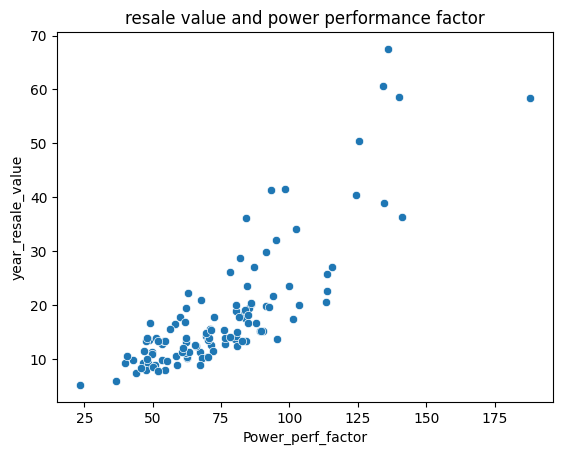

In [41]:
sns.scatterplot(x='Power_perf_factor',y='year_resale_value',data=car_sales)
plt.title('resale value and power performance factor')

In [42]:
# power factor has also influenced price on a medium impact

Text(0.5, 1.0, 'engine size and power performance factor')

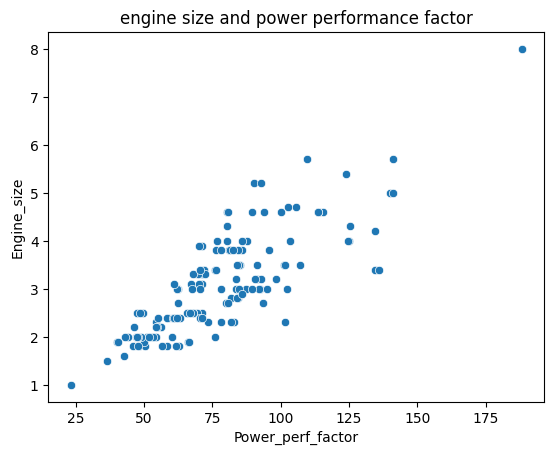

In [43]:
sns.scatterplot(x='Power_perf_factor',y='Engine_size',data=car_sales)
plt.title('engine size and power performance factor')

Text(0.5, 1.0, 'price vs power performance factor')

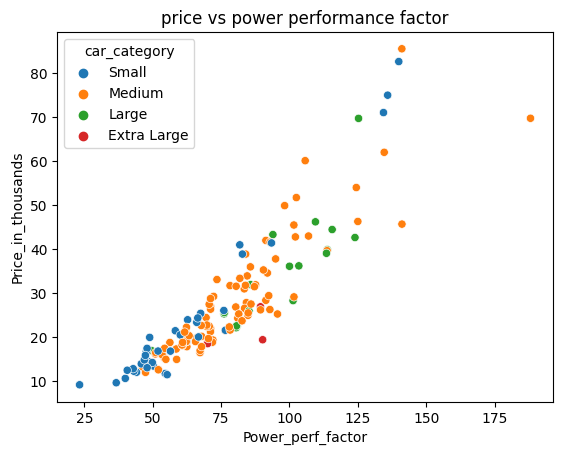

In [44]:
sns.scatterplot(x='Power_perf_factor',y='Price_in_thousands', hue='car_category',data=car_sales)
plt.title('price vs power performance factor')

In [79]:
# the power performance factor have high correlation with price

# hypothesis testing


In [85]:
from scipy.stats import pearsonr

In [88]:
# let's check pearson's correlation coeffiecient
#(to check the relation between two  continuous variable we use this test)


corr_coef, p_value = pearsonr(car_sales.Price_in_thousands,car_sales.Power_perf_factor)

print("Pearson's correlation coefficient:", corr_coef)
print("p-value:", p_value)



Pearson's correlation coefficient: 0.899032701769076
p-value: 2.1981816536353095e-56


The Pearson's correlation coefficient of 0.899032701769076 suggests a strong positive correlation between the two variables being analyzed. This means that as one variable increases, the other variable also tends to increase. The p-value of 2.1981816536353095e-56 is very small, which indicates that the observed correlation is statistically significant and unlikely to be due to chance.

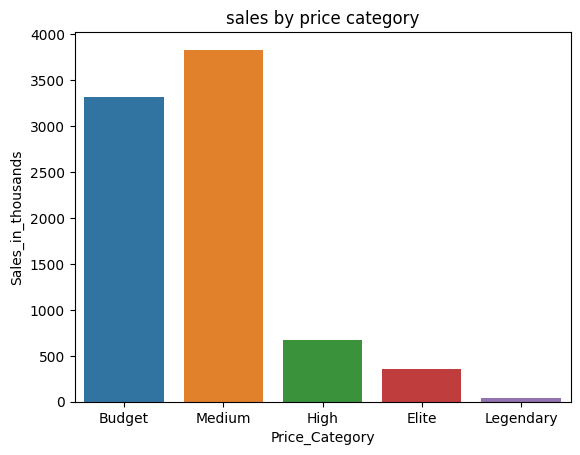

In [47]:
price_category_sales=car_sales.groupby('Price_Category')['Sales_in_thousands'].sum().reset_index()
sns.barplot(x='Price_Category',y='Sales_in_thousands',data=price_category_sales)
plt.title('sales by price category')
plt.show()

In [48]:
# medium priced then budget cars have the highest sales, which shows the charecteristics of customers

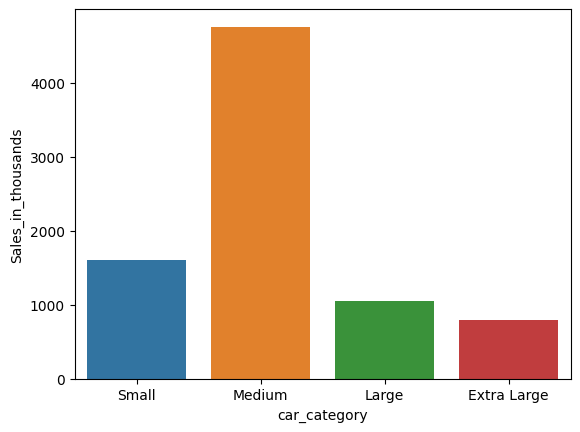

In [49]:
car_category_sales=car_sales.groupby('car_category')['Sales_in_thousands'].sum().reset_index()
sns.barplot(x='car_category',y='Sales_in_thousands',data=car_category_sales)
plt.show()

In [50]:
# medium sized cars are most selling

In [51]:
# our top selling models
top_model=car_sales.groupby('Model')['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index()
top_model=top_model[:10]

Text(0.5, 1.0, 'top 10 modelS')

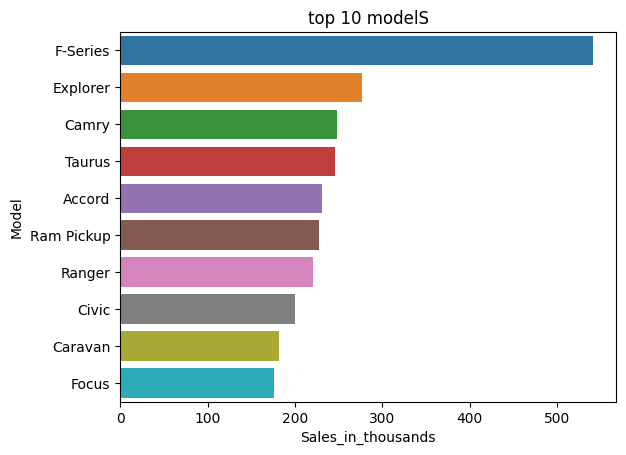

In [52]:
sns.barplot(y='Model',x='Sales_in_thousands',data=top_model)
plt.title('top 10 modelS')

In [53]:
# Ford F-series is our top selling model over 540 thousand sales!

#### Time to fill the resale value using regression imputation because 22% of the data is missing

In [54]:
car_sales.dtypes

Manufacturer                  object
Model                         object
Sales_in_thousands           float64
year_resale_value            float64
Price_in_thousands           float64
Engine_size                  float64
Horsepower                   float64
Wheelbase                    float64
Width                        float64
Length                       float64
Curb_weight                  float64
Fuel_capacity                float64
Fuel_efficiency              float64
Latest_Launch         datetime64[ns]
Power_perf_factor            float64
car_category                category
Power                       category
Price_Category              category
dtype: object

In [55]:
car_sales.corrwith(car_sales['year_resale_value'])

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_21636\718133977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_sales.corrwith(car_sales['year_resale_value'])


Sales_in_thousands   -0.279336
year_resale_value     1.000000
Price_in_thousands    0.953840
Engine_size           0.531354
Horsepower            0.770704
Wheelbase            -0.052263
Width                 0.178815
Length                0.026522
Curb_weight           0.361222
Fuel_capacity         0.325623
Fuel_efficiency      -0.346041
Power_perf_factor     0.827123
dtype: float64

In [56]:
# importing regression model
from sklearn.linear_model import LinearRegression


In [57]:

df=car_sales.dropna()
X= df[['Price_in_thousands','Power_perf_factor','Horsepower']]
y=df['year_resale_value']


In [58]:
# instantiate and fit model
reg=LinearRegression()
reg.fit(X,y)


LinearRegression()

In [59]:
# rows with null values
nulls=car_sales[car_sales['year_resale_value'].isnull()]

In [60]:
# Make predictions for missing values

ypred=reg.predict(nulls[['Price_in_thousands','Power_perf_factor','Horsepower']])

In [61]:
car_sales.loc[car_sales['year_resale_value'].isnull(),'year_resale_value']=ypred

In [62]:
car_sales

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,car_category,Power,Price_Category
0,Acura,Integra,16.919,16.360000,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,Small,Low_power,Medium
1,Acura,TL,39.384,19.875000,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,Medium,Medium_power,Medium
3,Acura,RL,8.588,29.725000,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,Medium,Medium_power,Elite
4,Audi,A4,20.397,22.255000,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,Small,Low_power,Medium
5,Audi,A6,18.780,23.555000,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,Medium,Medium_power,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.811065,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812,Small,Medium_power,Medium
153,Volvo,S70,15.245,20.476554,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495,Medium,Medium_power,Medium
154,Volvo,V70,17.531,21.577229,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978,Medium,Medium_power,Medium
155,Volvo,C70,3.493,36.576378,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357,Medium,Medium_power,Elite


In [63]:
score = reg.score(car_sales[['Price_in_thousands','Power_perf_factor','Horsepower']], car_sales['year_resale_value'])
print("model score :",score)

model score : 0.9440190762488789


In [64]:
# model is success

In [65]:
# now lets predict  price of cars

# Predictive analysis

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [67]:
# convert categorical variable to numeric using one-hot encoding
model= pd.get_dummies(car_sales.drop(columns='Latest_Launch'), columns=['car_category','Power'])

In [68]:
# I'm dropping year_resale_value because 22% of them are predicted values
model=model.drop(columns=['Manufacturer','Model','year_resale_value','Price_Category'])

In [69]:
# Normalizing

scaler = MinMaxScaler()

df_norm=scaler.fit_transform(model)

In [70]:
# splitting and fitting the model
X = model.drop('Price_in_thousands',axis=1)
y= model['Price_in_thousands']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
reg.fit(X_train,y_train)

LinearRegression()

In [72]:
#predicting
y_pred=reg.predict(X_test)

In [73]:
# metrics
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [74]:
print('mse:', mse)
print('rmse:', rmse)
print('R-squared:', r2)

mse: 7.857730183654071e-16
rmse: 2.80316431620661e-08
R-squared: 1.0


## it attained a perfect score, which is ideal, it may because of over fitting

Im splitting training data into validation sets to avoid over fitting by doing hyper tuning

In [75]:

# Split data into training and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


### hyper parameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Instantiate a random forest regressor object
rfr = RandomForestRegressor(random_state=42)

# Instantiate a grid search object
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)


Best hyperparameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


To address potential overfitting, hyperparameter tuning was performed using a grid search with 5-fold cross-validation. The best hyperparameters found were 50 estimators, a maximum depth of 5, and a minimum samples split of 5.

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate a random forest regressor object with the best hyperparameters
rfr = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model to the entire training set
rfr.fit(X_trainval, y_trainval)

# Predict on the test set
y_pred = reg.predict(X_test)

print('mse:', mse)
print('rmse:', rmse)
print('R-squared:', r2)

mse: 7.857730183654071e-16
rmse: 2.80316431620661e-08
R-squared: 1.0


Still, Both the MSE and RMSE are very close to 0, which indicates that the model is making very accurate predictions.

The R-squared value measures the proportion of the variance in the dependent variable that is explained by the predictor variables. In our case, the R-squared value is 1.0. which is the ideal score. So our model is performing too well, may be its because our data set is small. To evaluate we may need a larger data set to evaluate the performance of the model.

In [78]:
# power performance factor largly impact the price
X.corrwith(y)

Sales_in_thousands         -0.305148
Engine_size                 0.627961
Horsepower                  0.841378
Wheelbase                   0.110836
Width                       0.330774
Length                      0.158112
Curb_weight                 0.524070
Fuel_capacity               0.423369
Fuel_efficiency            -0.447122
Power_perf_factor           0.899033
car_category_Small         -0.168752
car_category_Medium         0.058584
car_category_Large          0.154431
car_category_Extra Large   -0.056532
Power_Low_power            -0.544063
Power_Medium_power          0.060828
Power_High_power            0.635129
Power_ultimate              0.238397
dtype: float64